In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [22]:
data = pd.read_csv('Fifa 23 Players Data.csv')
df = data[data['Overall'] >= 85]
df = df.select_dtypes(include=np.number)
df

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,85,90,76000000,24,184,81,2195,483,82000,134900000,...,84,81,84,86,82,86,85,82,85,20
87,85,89,76000000,25,178,73,2183,462,170000,146300000,...,84,80,84,72,71,72,70,68,70,21
88,85,85,26500000,32,191,86,1305,456,65000,45100000,...,34,36,34,34,36,34,34,36,34,85
89,85,85,17500000,33,183,79,1356,467,40000,29800000,...,37,40,37,33,36,33,32,32,32,85


In [23]:
norm_df = preprocessing.normalize(df)
norm_df = pd.DataFrame(norm_df, columns = df.columns)
norm_df

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,8.013331e-07,8.013331e-07,0.475516,3.082050e-07,1.488190e-06,5.899925e-07,0.000019,0.000004,0.001717,0.879705,...,8.013331e-07,7.749155e-07,8.013331e-07,5.899925e-07,5.811866e-07,5.899925e-07,5.459632e-07,4.667105e-07,5.459632e-07,1.937289e-07
1,6.233806e-07,6.233806e-07,0.438422,2.329114e-07,1.267312e-06,5.548773e-07,0.000015,0.000003,0.003083,0.898764,...,6.096800e-07,5.754283e-07,6.096800e-07,4.589726e-07,4.589726e-07,4.589726e-07,4.315712e-07,3.973195e-07,4.315712e-07,1.438571e-07
2,4.749578e-07,4.749578e-07,0.438423,1.722374e-07,9.655735e-07,4.227646e-07,0.000012,0.000002,0.002192,0.898766,...,4.488612e-07,4.332033e-07,4.488612e-07,3.496942e-07,3.601328e-07,3.496942e-07,3.340363e-07,3.288169e-07,3.340363e-07,1.148250e-07
3,4.024911e-07,4.024911e-07,0.475470,1.371123e-07,8.005591e-07,3.096085e-07,0.000010,0.000002,0.001548,0.879730,...,4.024911e-07,4.024911e-07,4.024911e-07,3.626843e-07,3.626843e-07,3.626843e-07,3.449923e-07,3.184545e-07,3.449923e-07,1.061515e-07
4,2.202162e-07,2.298961e-07,0.461002,5.565905e-08,4.404325e-07,1.766570e-07,0.000005,0.000001,0.000557,0.887399,...,2.226362e-07,2.032765e-07,2.226362e-07,1.693971e-07,1.597173e-07,1.693971e-07,1.597173e-07,1.379376e-07,1.597173e-07,5.081913e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,5.489699e-07,5.812622e-07,0.490844,1.550033e-07,1.188358e-06,5.231360e-07,0.000014,0.000003,0.000530,0.871248,...,5.425114e-07,5.231360e-07,5.425114e-07,5.554284e-07,5.295945e-07,5.554284e-07,5.489699e-07,5.295945e-07,5.489699e-07,1.291694e-07
87,5.155805e-07,5.398431e-07,0.460990,1.516413e-07,1.079686e-06,4.427926e-07,0.000013,0.000003,0.001031,0.887405,...,5.095148e-07,4.852522e-07,5.095148e-07,4.367270e-07,4.306613e-07,4.367270e-07,4.245957e-07,4.124644e-07,4.245957e-07,1.273787e-07
88,1.624950e-06,1.624950e-06,0.506602,6.117458e-07,3.651357e-06,1.644067e-06,0.000025,0.000009,0.001243,0.862179,...,6.499799e-07,6.882140e-07,6.499799e-07,6.499799e-07,6.882140e-07,6.499799e-07,6.499799e-07,6.882140e-07,6.499799e-07,1.624950e-06
89,2.459596e-06,2.459596e-06,0.506387,9.549019e-07,5.295365e-06,2.285977e-06,0.000039,0.000014,0.001157,0.862305,...,1.070648e-06,1.157457e-06,1.070648e-06,9.549019e-07,1.041711e-06,9.549019e-07,9.259655e-07,9.259655e-07,9.259655e-07,2.459596e-06


In [24]:
pca = PCA(n_components = 2)
pca.fit(norm_df)
pca_df = pca.transform(norm_df)
pca_df = pd.DataFrame(pca_df, columns=['PC1','PC2'])
pca_df

,PC1,PC2
0,-0.006154,-0.003815
1,-0.042391,0.016834
2,-0.042393,0.016826
3,-0.006201,-0.003791
4,-0.020533,0.004125
...,...,...
86,0.009306,-0.012032
87,-0.020544,0.004135
88,0.025515,-0.020265
89,0.025292,-0.020154


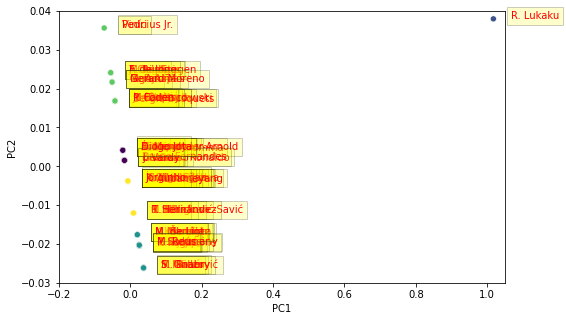

In [64]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)

plt.figure(figsize=(8,5))
sns.scatterplot(data=pca_df,x='PC1', y='PC2', c = kmeans.labels_)
for i in range(pca_df.shape[0]):
  plt.text(x=pca_df.PC1[i] + 0.05, y=pca_df.PC2[i], s=data['Known As'][i], fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.2))

plt.xlim(-0.2, 1.05)                
plt.ylim(-0.03, 0.04)               
plt.show()